# Highlight->Summarize data analysis

In [1]:
import os
import tiktoken
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.judges import JUDGES_MAP
from src.utils import NOANSWER_PRED
from run_experiments import load_all_results

/home/gcherubin/research/highlight-then-summarize/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RESULTS_DIR = "results/"
results = load_all_results(RESULTS_DIR)

Processing dataset: repliqa_3-subsampled
Processing run: repliqa_3-subsampled/HSBaseline-gpt-4.1-mini-gpt-4.1-mini
Processing run: repliqa_3-subsampled/HSStructuredHighlighter-gpt-4.1-mini-gpt-4.1-mini
Processing run: repliqa_3-subsampled/HSBERTExtractor-models
Skipping repliqa_3-subsampled/HSBERTExtractor-models as results/repliqa_3-subsampled/HSBERTExtractor-models/judgement doesn't exist.
Processing run: repliqa_3-subsampled/QAEvaluator-gpt-4.1-mini
Processing dataset: bioasq
Processing run: bioasq/HSBERTExtractor-deepset
Skipping bioasq/HSBERTExtractor-deepset as results/bioasq/HSBERTExtractor-deepset/judgement doesn't exist.
Processing run: bioasq/HSBaseline-gpt-4.1-mini-gpt-4.1-mini
Skipping bioasq/HSBaseline-gpt-4.1-mini-gpt-4.1-mini as results/bioasq/HSBaseline-gpt-4.1-mini-gpt-4.1-mini/judgement doesn't exist.
Processing run: bioasq/HSStructuredHighlighter-gpt-4.1-mini-gpt-4.1-mini
Error loading bioasq/HSStructuredHighlighter-gpt-4.1-mini-gpt-4.1-mini from results/bioasq/HSStr

In [ ]:
[c for c in results[next(results)].column_names if c.endswith("")

{'repliqa_3-subsampled/HSBaseline-gpt-4.1-mini-gpt-4.1-mini': Dataset({
     features: ['document_id', 'document_topic', 'document_path', 'document_extracted', 'question_id', 'question', 'answer', 'long_answer', 'answer_pred', 'summarizer_llm_response', 'summarizer_llm_guessed_question', 'highlighter_extracted', 'highlighter_llm_response', 'highlighter_text_extracts', 'highlighter_fuzzmatch_scores', 'highlighter_score', 'model_name', 'temperature', 'llm_response', 'highlighter_model_name', 'summarizer_model_name', 'MT-bench-QA_correctness', 'MT-bench-QA_correctness_explanation', 'MT-bench-QA_faithfulness', 'MT-bench-QA_faithfulness_explanation', 'MT-bench-QA_naturalness', 'MT-bench-QA_naturalness_explanation'],
     num_rows: 40
 }),
 'repliqa_3-subsampled/HSStructuredHighlighter-gpt-4.1-mini-gpt-4.1-mini': Dataset({
     features: ['document_id', 'document_topic', 'document_path', 'document_extracted', 'question_id', 'question', 'answer', 'long_answer', 'answer_pred', 'summarizer_llm_

In [ ]:
# LLM_JUDGE = "LLM-gpt-4.1-mini"

results_df = {}

select = ["document_extracted", "question", "answer", "answer_pred", "model_name", "temperature"]
select += judges_columns
try_select = ['summarizer_llm_response', 'summarizer_llm_guessed_question', 'highlighter_extracted', 'highlighter_llm_response', 'highlighter_text_extracts', 'highlighter_fuzzmatch_scores']

for dataset_name, dataset_result_list in results.items():
    print(f"Processing dataset: {dataset_name}")
    df_fname = os.path.join(RESULTS_DIR, dataset_name, "results.xlsx")
    to_cat = []

    for res in dataset_result_list:
        judged_predictions = res["judged_dataset"]
        pipeline = res["config"]["pipeline"]
        try:
            to_cat.append(pd.DataFrame(judged_predictions)[select + try_select])
        except KeyError:
            to_cat.append(pd.DataFrame(judged_predictions)[select])
        to_cat[-1]["pipeline"] = pipeline
        to_cat[-1]["run_id"] = res["run_id"]
        if "raw_text_extracts" in judged_predictions.column_names:
            to_cat[-1]["raw_text_extracts"] = judged_predictions["raw_text_extracts"]
        else:
            to_cat[-1]["raw_text_extracts"] = None
        if "long_answer" in judged_predictions.column_names:
            to_cat[-1]["long_answer"] = judged_predictions["long_answer"]

    df = pd.concat(to_cat, ignore_index=True)
    df.to_excel(
        os.path.join(df_fname),
        index=False,
        engine="xlsxwriter"
    )
    results_df[dataset_name] = df

To pandas for faster data analysis.

In [ ]:
LLM_JUDGE = "LLM-gpt-4.1-mini"

datasets_results = {}
judges_columns = []
judges = []
for run_id, res in results.items():
    dataset_name = res["config"]["dataset"]
    if dataset_name not in datasets_results:
        datasets_results[dataset_name] = []
    res["run_id"] = run_id
    datasets_results[dataset_name].append(res)
    for col in res["judged_dataset"].column_names:
        for judge in JUDGES_MAP:
            if col.startswith(f"{judge}"):
                if col not in judges_columns:
                    judges_columns.append(col)
                if judge not in judges:
                    judges.append(judge)
results_df = {}

select = ["document_extracted", "question", "answer", "answer_pred", "model_name", "temperature"]
select += judges_columns
try_select = ['summarizer_llm_response', 'summarizer_llm_guessed_question', 'highlighter_extracted', 'highlighter_llm_response', 'highlighter_text_extracts', 'highlighter_fuzzmatch_scores']

for dataset_name, dataset_result_list in datasets_results.items():
    print(f"Processing dataset: {dataset_name}")
    df_fname = os.path.join(RESULTS_DIR, dataset_name, "results.xlsx")
    to_cat = []

    for res in dataset_result_list:
        judged_predictions = res["judged_dataset"]
        pipeline = res["config"]["pipeline"]
        try:
            to_cat.append(pd.DataFrame(judged_predictions)[select + try_select])
        except KeyError:
            to_cat.append(pd.DataFrame(judged_predictions)[select])
        to_cat[-1]["pipeline"] = pipeline
        to_cat[-1]["run_id"] = res["run_id"]
        if "raw_text_extracts" in judged_predictions.column_names:
            to_cat[-1]["raw_text_extracts"] = judged_predictions["raw_text_extracts"]
        else:
            to_cat[-1]["raw_text_extracts"] = None
        if "long_answer" in judged_predictions.column_names:
            to_cat[-1]["long_answer"] = judged_predictions["long_answer"]

    df = pd.concat(to_cat, ignore_index=True)
    df.to_excel(
        os.path.join(df_fname),
        index=False,
        engine="xlsxwriter"
    )
    results_df[dataset_name] = df

Processing dataset: repliqa_3-subsampled
Processing dataset: bioasq-subsampled


In [6]:
results_df = {}

for dataset_name in os.listdir(RESULTS_DIR):
    if not os.path.isdir(os.path.join(RESULTS_DIR, dataset_name)):
        continue
    if "subsampled" in dataset_name:
        continue
    fname = os.path.join(RESULTS_DIR, dataset_name, "results.xlsx")
    if not os.path.exists(fname):
        print(f"File {fname} does not exist, skipping.")
        continue
    print(f"Loading results from {fname}")
    results_df[dataset_name] = pd.read_excel(fname, engine="openpyxl")

Loading results from results/bioasq/results.xlsx
Loading results from results/repliqa_3/results.xlsx


# Ablation study

First, define k-precision and recall:

In [12]:
enc = tiktoken.encoding_for_model("gpt-4")
encode = lambda x: len(enc.encode(x))

def ref_answer_recall(answer, answer_pred):
    """This metric measures the proportion of tokens in the
    reference `answer` that are present in the model response.
    """
    if answer == NOANSWER_PRED:
        raise ValueError("Reference answer is NOANSWER_PRED.")

    if answer_pred == NOANSWER_PRED:
        return 0.0
    
    answer_tokens = set(enc.encode(answer))
    answer_pred_tokens = set(enc.encode(answer_pred))
    common_tokens = answer_tokens.intersection(answer_pred_tokens)
    recall = len(common_tokens) / len(answer_tokens)
    return recall

def ref_passage_precision(passage, answer_pred):
    """This metric measures the proportion of tokens in the model
    response `answer_pred` that are present in the "gold passage" `passage`.
    """
    if answer_pred == NOANSWER_PRED:
        return 0.0
    
    passage_tokens = set(enc.encode(passage))
    answer_pred_tokens = set(enc.encode(answer_pred))
    common_tokens = passage_tokens.intersection(answer_pred_tokens)
    precision = len(common_tokens) / len(answer_pred_tokens)
    return precision

## How precise are the highlighters?

We use `long_answer`, so we can only do this for the RepliQA dataset.

In [100]:
def compute_highlighter_precision(row):
    if row["highlighter_text_extracts"] is None or pd.isnull(row["highlighter_text_extracts"]):
        return 0.0
    try:
        text_extracts = eval(row["highlighter_text_extracts"])
    except Exception as e:
        print(type(row["highlighter_text_extracts"]))
        print(f"Error evaluating highlighter_text_extracts: {row['highlighter_text_extracts']}")
        raise e
    if not text_extracts:
        return 0.0
    if len(text_extracts) == 1:
        highlighter_text = text_extracts[0]
        print(f"Highlighter text: {highlighter_text}")
        
        return ref_passage_precision(row["document_extracted"], highlighter_text)
    else:
        precisions = []
        for highlighter_text in text_extracts:
            if highlighter_text.strip():
                precisions.append(ref_passage_precision(row["document_extracted"], highlighter_text))
        # Return the maximum precision across all extracts.
        return np.max(precisions)

In [115]:
results_df["repliqa_3"].pipeline.unique()

array(['QAEvaluator', 'HSBaseline', 'HSStructuredHighlighter'],
      dtype=object)

Dataset: repliqa_3
\begin{tabular}{l|c}
\toprule
Pipeline & Highlighter precision \\
\midrule
HSBaseline & 0.9774 (std: 0.0428) \\
HSStructuredHighlighter & 0.9847 (std: 0.0782) \\
\bottomrule
\end{tabular}


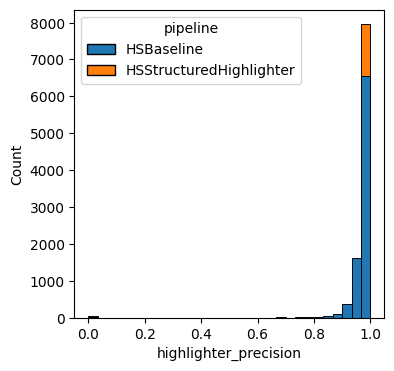

In [99]:
for dataset_name, df in results_df.items():
    if not "repliqa" in dataset_name:
        continue
    # Filter out no-answer predictions.
    df = df[df.pipeline != "QAEvaluator"]
    df = df[df.answer != NOANSWER_PRED]
    df = df[df.long_answer != ""]
    df = df[df.apply(lambda x: x["long_answer"] in x["document_extracted"], axis=1)]

    df["highlighter_precision"] = df.apply(
        lambda x: compute_highlighter_precision(x),
        axis=1
    )

    plt.figure(figsize=(4, 4))
    ax = sns.histplot(
            data=df,
            x="highlighter_precision",
            hue="pipeline",
            stat="count",
            bins=30,
            alpha=1,
        )

    print(f"Dataset: {dataset_name}")
    print(f"\\begin{{tabular}}{{l|c}}")
    print("\\toprule")
    print(f"Pipeline & Highlighter precision \\\\")
    print("\\midrule")
    for pipeline in df.pipeline.unique():
        pipeline_df = df[df.pipeline == pipeline]
        if len(pipeline_df) == 0:
            continue
        print(f"{pipeline} & {pipeline_df['highlighter_precision'].mean():.4f} (std: {pipeline_df['highlighter_precision'].std():.4f}) \\\\")
    print("\\bottomrule")
    print(f"\\end{{tabular}}")

In [112]:
df.iloc[np.where(pd.isnull(pipeline_df.summarizer_llm_guessed_question))].iloc[4]

document_extracted                                                    Addressing the Tobacco Epidemic with Innovativ...
question                                                              How does Emily Rivera contribute to the effort...
answer                                                                Emily Rivera contributes by working as a tobac...
answer_pred                                                                                                UNANSWERABLE
model_name                                                                                                          NaN
temperature                                                                                                         NaN
PollMultihopCorrectness-gpt-4.1-mini_correctness_rating                                                           False
PollMultihopCorrectness-gpt-4.1-mini_correctness_explanation          The reference answer states the question is UN...
ReliableCIRelevance-gpt-4.1-mini_correct

In [101]:
compute_highlighter_precision(df.iloc[np.where(pd.isnull(pipeline_df.summarizer_llm_guessed_question))].iloc[0])

Highlighter text: On October 5, 2023, Ana Ruiz of one such town, who reported her encounter as shopkeeper in nearby town Ana Ruiz recounted an oppressive chill and feeling of dread as this mysterious figure came near before vanishing back into thin air.


1.0

## Can the Summarizer guess what was the question?

Dataset: repliqa_3
\begin{tabular}{l|c}
\toprule
Pipeline & Question guessing accuracy \\
\midrule
HSBaseline & 0.9756 (std: 0.0658) \\
HSStructuredHighlighter & 0.9821 (std: 0.0940) \\
\bottomrule
\end{tabular}
Dataset: repliqa_3
\begin{tabular}{l|c}
\toprule
Pipeline & Question guessing accuracy \\
\midrule
HSBaseline & 0.9800 (std: 0.0289) \\
HSStructuredHighlighter & 0.9910 (std: 0.0159) \\
\bottomrule
\end{tabular}


<Figure size 400x400 with 0 Axes>

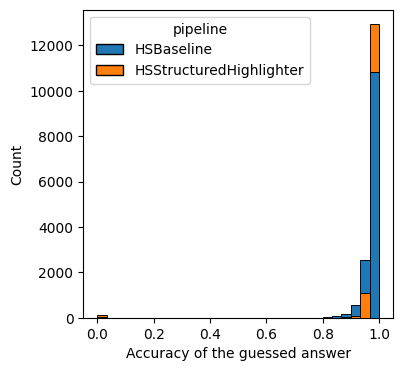

In [75]:
def evaluate_summarizer_on_question(row):
    if row["summarizer_llm_guessed_question"] is None or str(row["summarizer_llm_guessed_question"]) == "nan":
        return 0.0
    try:
        guessed_question = eval(row["summarizer_llm_guessed_question"])
    except Exception as e:
        print(type(row["summarizer_llm_guessed_question"]))
        print(f"Error evaluating summarizer_llm_guessed_question: {row['summarizer_llm_guessed_question']}")
        raise e
    if not guessed_question:
        return 0.0
    return ref_answer_recall(row["question"], guessed_question)

plt.figure(figsize=(4, 4))
for dataset_name, df in results_df.items():
    if not "repliqa" in dataset_name:
        continue
    # Filter out no-answer predictions.
    df = df[df.pipeline != "QAEvaluator"]
    df = df[df.answer != NOANSWER_PRED]

    df["guess_prediction_accuracy"] = df.apply(
        lambda x: compute_highlighter_precision(x),
        axis=1
    )

    # All included
    print(f"Dataset: {dataset_name}")
    print(f"\\begin{{tabular}}{{l|c}}")
    print("\\toprule")
    print(f"Pipeline & Question guessing accuracy \\\\")
    print("\\midrule")
    for pipeline in df.pipeline.unique():
        pipeline_df = df[df.pipeline == pipeline]
        if len(pipeline_df) == 0:
            continue
        print(f"{pipeline} & {pipeline_df['guess_prediction_accuracy'].mean():.4f} (std: {pipeline_df['guess_prediction_accuracy'].std():.4f}) \\\\")
    print("\\bottomrule")
    print(f"\\end{{tabular}}")

    # Only those for which the summarizer returned something.
    print(f"Dataset: {dataset_name}")
    print(f"\\begin{{tabular}}{{l|c}}")
    print("\\toprule")
    print(f"Pipeline & Question guessing accuracy \\\\")
    print("\\midrule")
    for pipeline in df.pipeline.unique():
        pipeline_df = df[df.pipeline == pipeline]
        pipeline_df = pipeline_df.iloc[np.where(~pd.isnull(pipeline_df.summarizer_llm_guessed_question))]
        if len(pipeline_df) == 0:
            continue
        print(f"{pipeline} & {pipeline_df['guess_prediction_accuracy'].mean():.4f} (std: {pipeline_df['guess_prediction_accuracy'].std():.4f}) \\\\")
    print("\\bottomrule")
    print(f"\\end{{tabular}}")

    plt.figure(figsize=(4, 4))
    ax = sns.histplot(
            data=df,
            x="guess_prediction_accuracy",
            hue="pipeline",
            stat="count",
            bins=30,
            alpha=1,
        )

    for bar0, bar1 in zip(ax.containers[0], ax.containers[1]):
        order = np.argsort([bar0.get_height(), bar1.get_height()])
        bar0.set_zorder(4 - order[0])
        bar1.set_zorder(4 - order[1])

    ax.set_xlabel("Accuracy of the guessed answer")

The cases where the precision is worse (i.e., 0) aren't very interesting: it's when the highlighter failed to give
anything good:

In [76]:
worst = pipeline_df.iloc[np.where(pipeline_df.guess_prediction_accuracy == pipeline_df.guess_prediction_accuracy.min())]
worst.head()

,document_extracted,question,answer,answer_pred,model_name,temperature,PollMultihopCorrectness-gpt-4.1-mini_correctness_rating,PollMultihopCorrectness-gpt-4.1-mini_correctness_explanation,ReliableCIRelevance-gpt-4.1-mini_correctness_rating,ReliableCIRelevance-gpt-4.1-mini_correctness_explanation,...,run_id,raw_text_extracts,long_answer,summarizer_llm_response,summarizer_llm_guessed_question,highlighter_extracted,highlighter_llm_response,highlighter_text_extracts,highlighter_fuzzmatch_scores,guess_prediction_accuracy
51921,Introduction: A New Horizon at Apex Innovation...,How often does Apex Innovations review expense...,Bi-monthly.,Apex Innovations reviews employee submissions ...,NaN,0.2,True,The Provided Answer states 'Bi-monthly' as the...,3,The passage directly answers the query by indi...,...,results/repliqa_3/HSStructuredHighlighter-gpt-...,NaN,Tracking the company's reimbursement cycle was...,guessed_question='How often does Apex Innovati...,How often does Apex Innovations review employe...,"""Bi-monthly, Apex Innovations reviewed submiss...",Apex Innovations reviews expense submissions f...,"['""Bi-monthly, Apex Innovations reviewed submi...",[98.07692307692307],0.842105


We therefore look at cases where the `summarizer_llm_guessed_question` isn't NaN:

In [ ]:
worst = pipeline_df.iloc[np.where(~pd.isnull(pipeline_df.summarizer_llm_guessed_question))]
# Sort and keep the worst 5.
worst = worst.sort_values(by="guess_prediction_accuracy", ascending=True).head(5)
#worst = worst.iloc[np.where(worst.guess_prediction_accuracy < 0.88)]
print("\\begin{tabularx}{\\textwidth}{cXX}")
print("\\toprule")
print("Score & Real question & Guessed question \\\\")
print("\\midrule")
for _, w in worst.iterrows():
    # print("-"*20)
    # print(f"Score: {w.guess_prediction_accuracy:.4f}")
    # print(f"Real question:    {w.question}")
    # print(f"Guessed question: {w.summarizer_llm_guessed_question}")
    # print(f"Document: {w.long_answer}")
    # print()
    # Into a latex table.
    print(f"{w.guess_prediction_accuracy:.4f} & {w.question} & {w.summarizer_llm_guessed_question} \\\\")

print("\\bottomrule")
print("\\end{tabularx}")

\begin{tabularx{\textwidth}{cXX}
\toprule
Score & Real question & Guessed question \
\midrule
0.8421 & How often does Apex Innovations review expense submissions for reimbursement? & How often does Apex Innovations review employee submissions for reimbursement? \\
0.8529 & What event at Crystal River is scheduled for October 5, 2023, for anglers? & When and where is the "Silver Strike" competition taking place, and what is its objective? \\
0.8571 & How do MarketLeader Inc. suggest SMEs stay current with competitors' strategic moves? & How do innovative companies like MarketLeader Inc. suggest SMEs keep up with competitors' strategies? \\
0.8571 & What example was reported by the 'Journal of Healthcare Law' illustrating a gap in the respect for advanced directives? & What is an example illustrating the inconsistent respect for advanced directives across jurisdictions as reported by the Journal of Healthcare Law? \\
0.8571 & What is the staggering percentage of freshwater resources cons

## The importance of a generative summarizer

# Full pipelines comparison: vanilla vs HS RAG

## Answerable questions

### K-precision and recall

In [10]:
DATASET = "repliqa_3-subsampled"
for run_id in results_df[DATASET].run_id.unique():
    df = results_df[DATASET][results_df[DATASET].run_id == run_id]
    df = df[df.answer != NOANSWER_PRED]
    print(f"Run ID: {run_id}")
    
    # Calculate recall and precision
    df["ref_answer_recall"] = df.apply(
        lambda row: ref_answer_recall(row["answer"], row["answer_pred"]), axis=1
    )
    df["ref_passage_precision"] = df.apply(
        lambda row: ref_passage_precision(row["long_answer"], row["answer_pred"]), axis=1
    )
    
    # Print statistics
    print(f"Average Recall: {df['ref_answer_recall'].mean():.4f}")
    print(f"Average Precision: {df['ref_passage_precision'].mean():.4f}")

Run ID: results/repliqa_3-subsampled/HSBaseline-gpt-4.1-mini-gpt-4.1-mini
Average Recall: 0.7542
Average Precision: 0.7442
Run ID: results/repliqa_3-subsampled/HSStructuredHighlighter-gpt-4.1-mini-gpt-4.1-mini
Average Recall: 0.7986
Average Precision: 0.7289
Run ID: results/repliqa_3-subsampled/QAEvaluator-gpt-4.1-mini
Average Recall: 0.6670
Average Precision: 0.7968


### LLM as a judge

#### PollMultihopCorrectness

Provides yes/no ratings.

In [11]:
for dataset_name, df in results_df.items():
    # Filter out no-answer predictions.
    df = df[df.answer != NOANSWER_PRED]
    correct = {}
    for pipeline in df.pipeline.unique():
        correct[pipeline] = np.mean(
            df[df.pipeline == pipeline]["PollMultihopCorrectness-gpt-4.1-mini_correctness_rating"] == True
        )
    plt.figure(figsize=(4, 4))
    sns.barplot(
        x=list(correct.keys()),
        y=list(correct.values()),
        palette="viridis"
    )
    # Show the % correct on the bars.
    for i, v in enumerate(correct.values()):
        plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom')
    plt.ylim(0, 1)
    plt.title(f"PollMultihopCorrectness for {dataset_name}")
    plt.xlabel("Pipeline")
    plt.ylabel("Correctness (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    print(f"Dataset: {dataset_name}")
    print(correct)

KeyError: 'PollMultihopCorrectness-gpt-4.1-mini_correctness_rating'

#### ReliableCIRelevance

Provides a relevance score from 0 to 3.

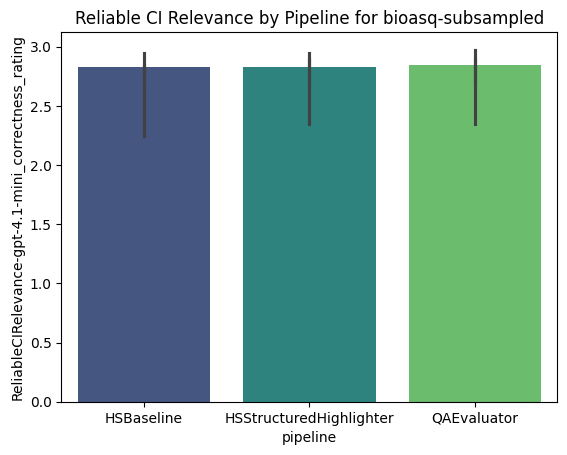

In [33]:
for dataset_name, df in results_df.items():
    # Filter out no-answer predictions.
    df = df[df.answer != NOANSWER_PRED]
    sns.barplot(
        x="pipeline",
        y="ReliableCIRelevance-gpt-4.1-mini_correctness_rating",
        palette="viridis",
        data=df,
        hue="pipeline",
    )
    plt.title(f"Reliable CI Relevance by Pipeline for {dataset_name}")

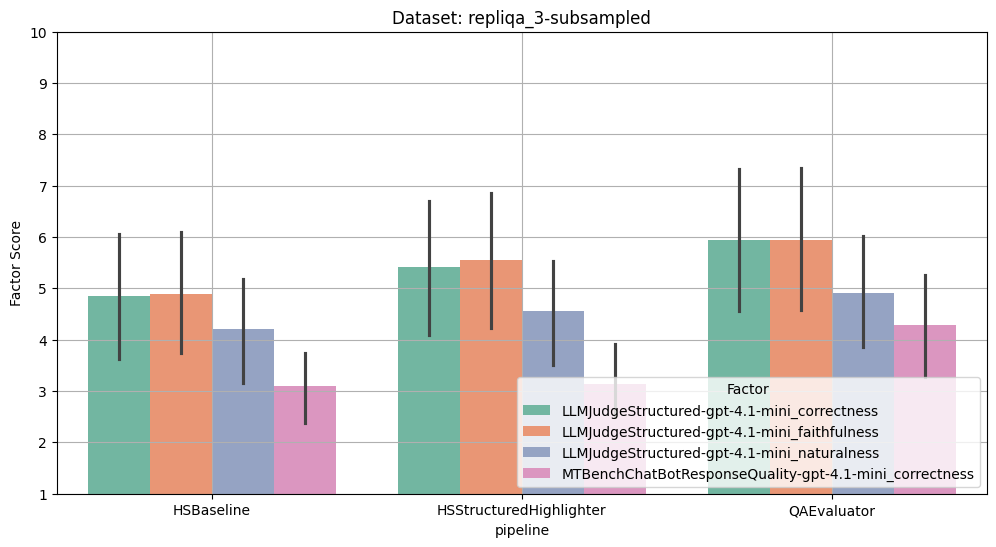

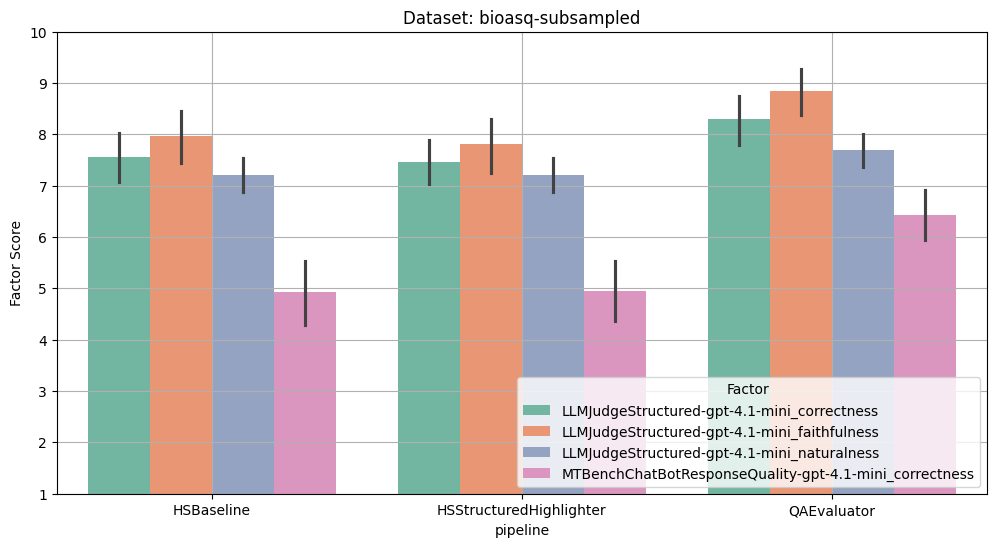

In [28]:
factors = ["_".join(col.split("_")[:2]) for col in judges_columns if col.endswith("_rating")]
factors = [f for f in factors if "PollMultihopCorrectness" not in f]
factors = [f for f in factors if "ReliableCIRelevance" not in f]

for dataset_name, df in results_df.items():
    # Filter out no-answer predictions.
    df = df[df.answer_pred != NOANSWER_PRED]
    # Each factor gets a replica of the data, and we then concatenate.
    to_cat = []
    for factor in factors:
        df_factor = df.copy()
        df_factor["factor"] = factor
        df_factor["factor_rating"] = df_factor[f"{factor}_rating"]
        to_cat.append(df_factor)
    df = pd.concat(to_cat, ignore_index=True)

    # Violin plot for each run_id (i.e., config). Hue is the factor.
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="pipeline",
        y="factor_rating",
        hue="factor",
        data=df,
        palette="Set2",
    )
    plt.ylabel("Factor Score")
    plt.ylim(1, 10)
    plt.grid()
    plt.legend(loc="lower right", title="Factor")
    plt.title(f"Dataset: {dataset_name}")

## Unanswerable questions

In [ ]:
# Confusion matrix for (answer is answerable/unanswerable, answer_pred is answerable/unanswerable)
judged_dataset = inference_datasets["repliqa_3"]
for model_name in judged_dataset:
    answerable = judged_dataset[model_name].filter(
        lambda example: example["answer"] != NOANSWER_PRED
    )
    unanswerable = judged_dataset[model_name].filter(
        lambda example: example["answer"] == NOANSWER_PRED
    )
    answerable_correct = len(answerable.filter(lambda example: example["answer_pred"] != NOANSWER_PRED))
    unanswerable_correct = len(unanswerable.filter(lambda example: example["answer_pred"] == NOANSWER_PRED))

    # Plot as confusion matrix.
    confusion_matrix = np.array([[answerable_correct, len(answerable) - answerable_correct],
                                  [len(unanswerable) - unanswerable_correct, unanswerable_correct]])
    plt.figure(figsize=(3, 3))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Answerable", "Unanswerable"],
                yticklabels=["Answerable", "Unanswerable"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted") 

##### Correct questions (among those that can be answered)

In [ ]:
MIN_RATING = 1
MAX_RATING = 5
judge_name = "MT-bench-QA"

ratings = {}

for experiment_name, res in results.items():
    dataset_name = res["config"]["dataset"]
    judged_predictions = res["judged_dataset"]
    
    if dataset_name not in ratings:
        ratings[dataset_name] = {}
    
    for model_name, judged_preds in judged_predictions.items():
        dataset = judged_preds.filter(
            lambda example: example["answer"] != NOANSWER_PRED,
            load_from_cache_file=False
        )
        
        for factor in ["correctness", "faithfulness", "naturalness"]:
            col = f"{judge_name}_{factor}"
            ratings[dataset_name].setdefault(model_name, {})[col] = dataset[col]
    
    
for dataset_name, judged_predictions in results.items():
    ratings[dataset_name] = {}
    for model_name in judged_predictions:
        dataset = judged_predictions[model_name].filter(
            lambda example: example["answer"] != NOANSWER_PRED,
            load_from_cache_file=False
        )
        for factor in ["correctness", "faithfulness", "naturalness"]:
            col = f"{judge_name}_{factor}"
            ratings[dataset_name].setdefault(model_name, {})[col] = dataset[col]

Filter: 100%|██████████| 40/40 [00:00<00:00, 9228.39 examples/s]


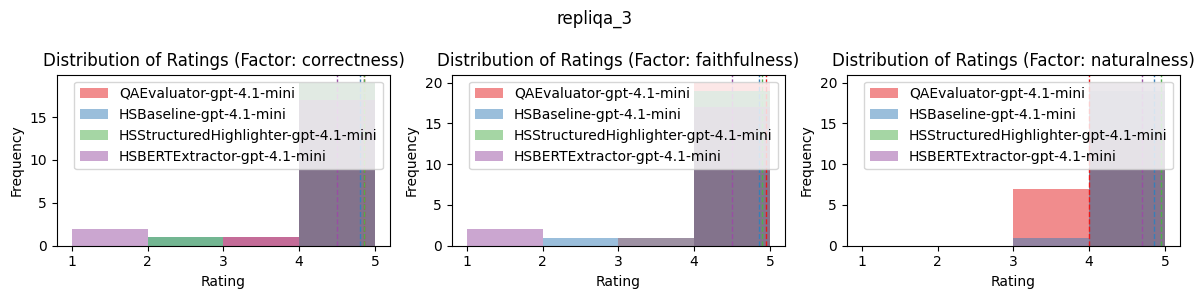

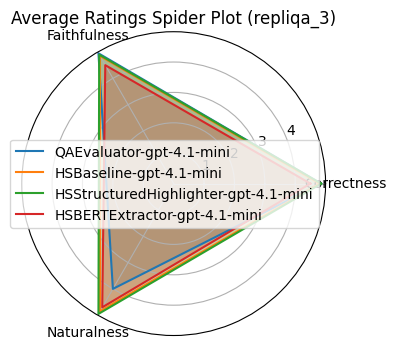

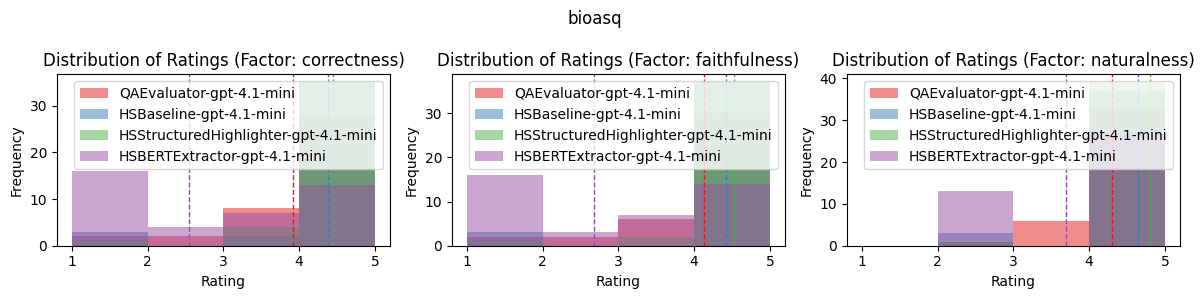

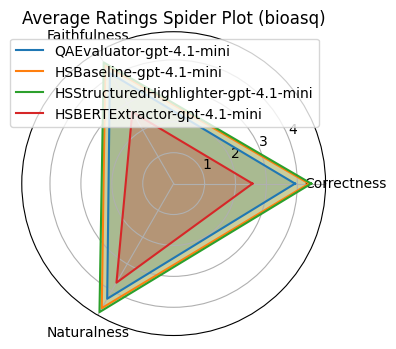

In [7]:
judge_name = "MT-bench-QA"
llms = ["gpt-4.1-mini"]
for dataset_name, dataset_ratings in ratings.items():
    fig, axes = plt.subplots(1, 3, figsize=(4*3, 3))
    for factor, ax in zip(["correctness", "faithfulness", "naturalness"], axes.flatten()):
        #plt.figure(figsize=(4, 3))
        colors = sns.color_palette("Set1", n_colors=len(dataset_ratings))
        for model_name in dataset_ratings:
            model_ratings = dataset_ratings[model_name]
            color = colors.pop(0)
            judge_ratings = model_ratings[f"{judge_name}_{factor}"]
            ax.hist(judge_ratings, alpha=0.5, label=f"{model_name}", color=color, density=False, bins=np.arange(MIN_RATING, MAX_RATING + 1, 1))
            # A vertical line for each model's average rating.
            avg_rating = np.mean(judge_ratings)
            ax.axvline(avg_rating, linestyle='--', linewidth=1, color=color) #label=f"{model_name} Avg"

        ax.set_xlabel("Rating")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Distribution of Ratings (Factor: {factor})")
        # plt.suptitle(dataset_name)
        ax.set_xticks(np.arange(MIN_RATING, MAX_RATING + 1, 1))
        ax.legend()
        plt.suptitle(dataset_name)
        plt.tight_layout()
    
    # A spider plot for each model's average ratings.
    spider_data = {}
    for model_name in dataset_ratings:
        model_ratings = dataset_ratings[model_name]
        avg_ratings = [np.mean(model_ratings[f"{judge_name}_{factor}"]) for factor in ["correctness", "faithfulness", "naturalness"]]
        spider_data[model_name] = avg_ratings
    # Create a spider plot.
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    num_vars = len(spider_data[next(iter(spider_data))])
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    for model_name, avg_ratings in spider_data.items():
        avg_ratings += avg_ratings[:1]  # Complete the loop
        ax.plot(angles, avg_ratings, label=model_name)
        ax.fill(angles, avg_ratings, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(["Correctness", "Faithfulness", "Naturalness"])
    ax.set_title(f"Average Ratings Spider Plot ({dataset_name})")
    plt.legend()
    plt.tight_layout()

#### Unanswerable

Filter:   0%|          | 0/40 [00:00<?, ? examples/s]

Filter: 100%|██████████| 20/20 [00:00<00:00, 4199.34 examples/s]


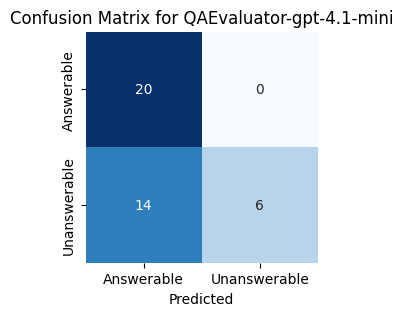

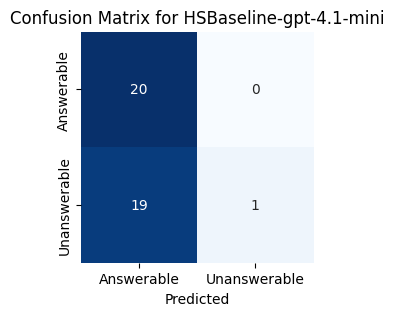

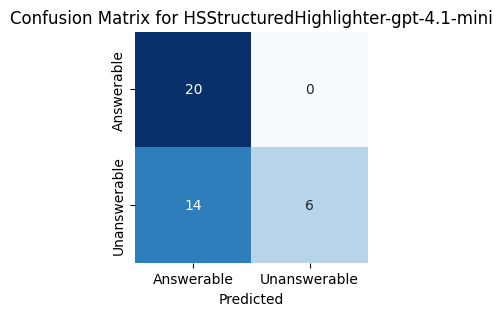

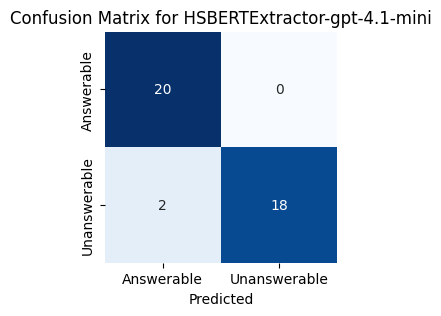

In [8]:
# Confusion matrix for (answer is answerable/unanswerable, answer_pred is answerable/unanswerable)
judged_dataset = inference_datasets["repliqa_3"]
for model_name in judged_dataset:
    answerable = judged_dataset[model_name].filter(
        lambda example: example["answer"] != NOANSWER_PRED
    )
    unanswerable = judged_dataset[model_name].filter(
        lambda example: example["answer"] == NOANSWER_PRED
    )
    answerable_correct = len(answerable.filter(lambda example: example["answer_pred"] != NOANSWER_PRED))
    unanswerable_correct = len(unanswerable.filter(lambda example: example["answer_pred"] == NOANSWER_PRED))

    # Plot as confusion matrix.
    confusion_matrix = np.array([[answerable_correct, len(answerable) - answerable_correct],
                                  [len(unanswerable) - unanswerable_correct, unanswerable_correct]])
    plt.figure(figsize=(3, 3))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Answerable", "Unanswerable"],
                yticklabels=["Answerable", "Unanswerable"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted") 

#### Recall and K-F1

Referring to https://direct.mit.edu/tacl/article/doi/10.1162/tacl_a_00667/121196.

In [ ]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4")
encode = lambda x: len(enc.encode(x))

def ref_answer_recall(answer, answer_pred):
    """This metric measures the proportion of tokens in the
    reference `answer` that are present in the model response.
    """
    if answer == NOANSWER_PRED:
        raise ValueError("Reference answer is NOANSWER_PRED.")

    if answer_pred == NOANSWER_PRED:
        return 0.0
    
    answer_tokens = set(enc.encode(answer))
    answer_pred_tokens = set(enc.encode(answer_pred))
    common_tokens = answer_tokens.intersection(answer_pred_tokens)
    recall = len(common_tokens) / len(answer_tokens)
    return recall

def ref_passage_precision(passage, answer_pred):
    """This metric measures the proportion of tokens in the model
    response `answer_pred` that are present in the "gold passage" `passage`.
    """
    if answer_pred == NOANSWER_PRED:
        return 0.0
    
    passage_tokens = set(enc.encode(passage))
    answer_pred_tokens = set(enc.encode(answer_pred))
    common_tokens = passage_tokens.intersection(answer_pred_tokens)
    precision = len(common_tokens) / len(answer_pred_tokens)
    return precision

Model: QAEvaluator-gpt-4.1-mini
  Ref Answer Recall: 0.6697
  Ref Passage Precision: 0.8101
Model: HSBaseline-gpt-4.1-mini
  Ref Answer Recall: 0.7633
  Ref Passage Precision: 0.7268
Model: HSBaseline-gpt-4.1-mini-highlighter
  Ref Answer Recall: 0.7327
  Ref Passage Precision: 0.8795
Model: HSStructuredHighlighter-gpt-4.1-mini
  Ref Answer Recall: 0.8202
  Ref Passage Precision: 0.7334
Model: HSStructuredHighlighter-gpt-4.1-mini-highlighter
  Ref Answer Recall: 0.7909
  Ref Passage Precision: 0.8879
Model: HSBERTExtractor-gpt-4.1-mini
  Ref Answer Recall: 0.7236
  Ref Passage Precision: 0.6389
Model: HSBERTExtractor-gpt-4.1-mini-highlighter
  Ref Answer Recall: 0.4530
  Ref Passage Precision: 0.7829
Skipping dataset bioasq for evaluation because it doesn't contain `long_answer`.


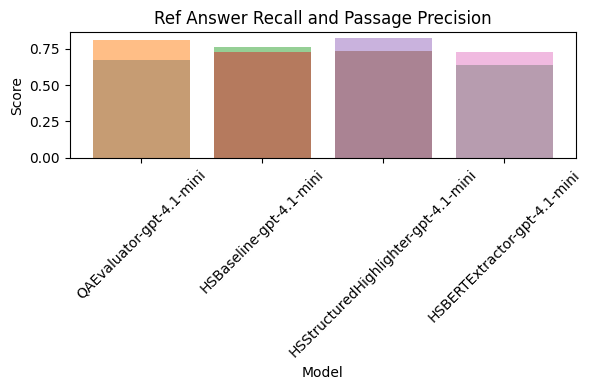

In [10]:
results = {}
for dataset_name, judged_predictions in inference_datasets.items():
    if dataset_name != "repliqa_3":
        print(f"Skipping dataset {dataset_name} for evaluation because it doesn't contain `long_answer`.")
        continue
    for model_name, dataset in judged_predictions.items():
        if not "mini" in model_name:
            continue
        results[model_name] = {
            "ref_answer_recall": [],
            "ref_passage_precision": [],
            "answer_length": [],
            "answer_pred_length": []
        }
        for example in dataset:
            # We skip unanswerable questions.
            if example["answer"] == NOANSWER_PRED:
                continue
            results[model_name]["ref_answer_recall"].append(
                ref_answer_recall(example["answer"], example["answer_pred"])
            )
            results[model_name]["ref_passage_precision"].append(
                ref_passage_precision(example["long_answer"], example["answer_pred"])
            )
        print(f"Model: {model_name}")
        print(f"  Ref Answer Recall: {np.mean(results[model_name]['ref_answer_recall']):.4f}")
        print(f"  Ref Passage Precision: {np.mean(results[model_name]['ref_passage_precision']):.4f}")

        # We also evaluate just the highlighter (i.e., no summarizer) for HS pipelines.
        if "HS" in model_name:
            results[f"{model_name}-highlighter"] = {
                "ref_answer_recall": [],
                "ref_passage_precision": [],
                "answer_length": [],
                "answer_pred_length": []
            }
            for example in dataset:
                if example["answer"] == NOANSWER_PRED:
                    continue
                results[f"{model_name}-highlighter"]["ref_answer_recall"].append(
                    ref_answer_recall(example["answer"], example["highlighter_extracted"])
                )
                results[f"{model_name}-highlighter"]["ref_passage_precision"].append(
                    ref_passage_precision(example["long_answer"], example["highlighter_extracted"])
                )
            print(f"Model: {model_name}-highlighter")
            print(f"  Ref Answer Recall: {np.mean(results[f'{model_name}-highlighter']['ref_answer_recall']):.4f}")
            print(f"  Ref Passage Precision: {np.mean(results[f'{model_name}-highlighter']['ref_passage_precision']):.4f}")

    # Plot the results as a bar chart.
    plt.figure(figsize=(6, 4))
    for model_name, result in results.items():
        if not "mini" in model_name:
            continue
        if "highlighter" in model_name:
            # Skip highlighter-only models for this plot.
            continue
        plt.bar(model_name, np.mean(result["ref_answer_recall"]), label=f"{model_name} Recall", alpha=0.5)
        plt.bar(model_name, np.mean(result["ref_passage_precision"]), label=f"{model_name} Precision", alpha=0.5)
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.title("Ref Answer Recall and Passage Precision")
    plt.xticks(rotation=45)
    # plt.legend()
    plt.tight_layout()